<a href="https://colab.research.google.com/github/ckj18/ToBigs_workspace/blob/main/wk2_optimization_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tobig's 19기 2주차 Optimization 과제

# Gradient Descent 구현하기

### 1)"..."표시되어 있는 빈 칸을 채워주세요
### 2)강의내용과 코드에 대해 공부한 내용을 마크마운 또는 주석으로 설명해주세요

## 데이터

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
data = pd.read_csv('assignment_2.csv')
data.head()

,Label,bias,experience,salary
0,1,1,0.7,48000
1,0,1,1.9,48000
2,1,1,2.5,60000
3,0,1,4.2,63000
4,0,1,6.0,76000


## Train Test 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:], data.iloc[:, 0], test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 3), (50, 3), (150,), (50,))

## Scaling

experience와 salary의 단위, 평균, 분산이 크게 차이나므로 scaler를 사용해 단위를 맞춰줍니다. 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bias_train = X_train["bias"]
bias_train = bias_train.reset_index()["bias"]
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_train["bias"] = bias_train
X_train.head()

,bias,experience,salary
0,1,0.187893,-1.143335
1,1,1.185555,0.043974
2,1,-0.310938,-0.351795
3,1,-1.629277,-1.341220
4,1,-1.308600,0.043974


이때 scaler는 X_train에 fit 해주시고, fit한 scaler를 X_test에 적용시켜줍니다.  
똑같이 X_test에다 fit하면 안돼요!

In [ ]:
bias_test = X_test["bias"]
bias_test = bias_test.reset_index()["bias"]
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test["bias"] = bias_test
X_test.head()

,bias,experience,salary
0,1,-1.344231,-0.615642
1,1,0.508570,0.307821
2,1,-0.310938,0.571667
3,1,1.363709,1.956862
4,1,-0.987923,-0.747565


In [ ]:
# parameter 개수
N = len(X_train.loc[0])

In [ ]:
# 초기 parameter들을 임의로 설정해줍니다.
parameters = np.array([random.random() for i in range(N)])
random_parameters = parameters.copy()
parameters

array([0.28789687, 0.50491972, 0.69215063])

### * LaTeX   

Jupyter Notebook은 LaTeX 문법으로 수식 입력을 지원하고 있습니다.  
LaTeX문법으로 아래의 수식을 완성해주세요  
http://triki.net/apps/3466  
https://jjycjnmath.tistory.com/117

## Dot product
## $z = X_i \theta$

In [ ]:
def dot_product(X, parameters):
    z = 0
    for i in range(len(parameters)):
        z += X @ parameters
    return z

## Logistic Function

## $p = \frac{1}{1 + e^{-z}}$

In [ ]:
def logistic(X, parameters):
    z = dot_product(X, parameters)
    p = 1.0 / (1 + np.exp(-z))  
    return p

In [ ]:
logistic(X_train.iloc[1], parameters)

0.9399603206919822

## Object function

Object Function : 목적함수는 Gradient Descent를 통해 최적화 하고자 하는 함수입니다.  
<br>
선형 회귀의 목적함수
## $l(\theta) = \frac{1}{2}\Sigma(y_i - \theta^{T}X_i)^2$  
참고) $\hat{y_i} = \theta^{T}X_i$
  
로지스틱 회귀의 목적함수를 작성해주세요  
(선형 회귀의 목적함수처럼 강의에 나온대로 작성해주세요. 평균을 고려하는 것은 뒤에 코드에서 수행합니다)
## $l(p) = -\Sigma\{y_i\log{p(X_i)} + (1 - y_i)\log{(1 - p(X_i))} \}$

In [ ]:
# Negative Log Likelihood 함수
def minus_log_cross_entropy_i(X, y, parameters):
    p = np.exp(dot_product(X, parameters)) / (1 + np.exp(dot_product(X, parameters)))
    loss = y * np.log(p) + (1-y) * np.log(1-p)
    return -loss

In [ ]:
# 선형 회귀 목적 함수: 오차 제곱 합
def mse_i(X, y, parameters):
    y_hat = parameters.T @ X
    loss = np.square(y_hat - y)
    return loss.mean()

In [ ]:
def batch_loss(X_set, y_set, parameters, loss_function, n): #n:현재 배치의 데이터 수
    loss = 0
    for i in range(X_set.shape[0]):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        loss += loss_function(X, y, parameters)
    loss = loss / n #loss 평균값으로 계산
    return loss

In [ ]:
batch_loss(X_test, y_test, parameters, minus_log_cross_entropy_i, len(X_test))

2.4784393074054996

## Gradient
위의 선형회귀의 목적함수 $l(\theta)$와 로지스틱회귀의 목적함수 $l(p)$의 gradient를 작성해주세요  
(위의 목적함수를 참고해서 작성해주세요 = 평균을 고려하는 것은 뒤에 코드에서 수행합니다)

## ${\partial\over{\partial \theta_j}}l(\theta)= -\Sigma(y_i - \theta^TX_i)X_{ij}$
## ${\partial\over{\partial \theta_j}}l(p)= -\Sigma(y_i - p_i)x_{ij}$

In [ ]:
def get_gradient_ij(X, y, parameters, j, model):
    if model == 'linear':
        y_hat = dot_product(parameters, X)
        gradient = np.sum((y - y_hat) * X[j])
    else:
        p = logistic(X, parameters)
        gradient = np.sum((y - p) * X[j])
    return -gradient

In [ ]:
get_gradient_ij(X_train.iloc[0,:], y_train.iloc[0], parameters, 1, 'logistic')

-0.1452560786299591

In [ ]:
from IPython.display import Image

Image("C:/Users/김건우/Desktop/배치알고리즘_구현.png")

## Batch Gradient
하나의 배치 (X_set, y_set)에 대해 기울기를 구하는 코드를 작성해주세요

In [ ]:
def batch_gradient(X_set, y_set, parameters, model):
    gradients = [0 for _ in range(len(parameters))]
    
    for i in range(len(X_set)):
        X = X_set.iloc[i,:]
        y = y_set.iloc[i]
        for j in range(len(parameters)):
            gradients[j] += get_gradient_ij(X, y, parameters, j, model)
    
    return gradients

In [ ]:
gradients1 = batch_gradient(X_train, y_train, parameters, 'logistic')
gradients1

[42.98376296082685, 33.63357288872598, 64.23941853980962]

## mini-batch
인덱스로 미니 배치 나누기

In [ ]:
def batch_idx(X_train, batch_size):
    N = len(X_train)
    nb = (N // batch_size)+1 #number of batch
    idx = np.array([i for i in range(N)])
    idx_list = [idx[i*batch_size:(i+1)*batch_size] for i in range(nb) if len(idx[i*batch_size:(i+1)*batch_size]) != 0]
    return idx_list

batch_idx 함수에 대한 설명을 batch_size와 함께 간략하게 작성해주세요  
### 설명: 학습되는 데이터 X_train에서 파라미터 업데이트를 배치 사이즈만큼 하도록 인덱스 구간을 정하는 함수

## Update Parameters
기울기를 갱신하는 코드를 작성해주세요  
(loss와 마찬가지로 기울기를 갱신할 때 배치 사이즈를 고려해 평균으로 갱신해주세요)

In [ ]:
def step(parameters, gradients, learning_rate, n): #n:현재 배치의 데이터 수
    for i in range(len(parameters)):
        gradients[i] *= learning_rate / n
    
    parameters -= gradients
    return parameters

In [ ]:
step(parameters, gradients1, 0.01, len(X_train))

array([0.28503129, 0.50267748, 0.687868  ])

## Gradient Descent
위에서 작성한 함수들을 조합해서 경사하강법 함수를 완성해주세요

- learning_rate: 학습률  
- tolerance: Step이 너무 작아서 더 이상의 학습이 무의미할 때 학습을 멈추는 조건  
- batch: 기울기를 1번 갱신할 때 사용하는 데이터셋  
- epoch:  
- num_epoch:
<br>

BGD: 학습 한 번에 모든 데이터셋을 사용하여 기울기를 업데이트함<p>
SGD: 학습 한 번에 임의의 1개의 데이터만 사용하여 기울기를 업데이트함<p>
MGD: 학습 한 번에 데이터셋의 일부만 사용하여 기울기를 업데이트함<p>
<br>
batch_size에 따른 경사하강법의 종류를 적어주세요  
batch_size=1 -> SGD  
batch_size=k -> MGD  
batch_size=whole -> BGD 

In [ ]:
def gradient_descent(X_train, y_train, learning_rate = 0.1, num_epoch = 1000, tolerance = 0.00001, model = 'logistic', batch_size = 16):
    stopper = False
    
    N = len(X_train.iloc[0])
    parameters = np.random.rand(N)
    loss_function = minus_log_cross_entropy_i if model == 'logistic' else mse_i
    loss = 999
    batch_idx_list = batch_idx(X_train, batch_size)
    
    for epoch in range(num_epoch):
        if stopper:
            break
        for idx in batch_idx_list:
            X_batch = X_train.iloc[idx,]
            y_batch = y_train.iloc[idx]
            gradients = batch_gradient(X_batch, y_batch, parameters, model)
            parameters = step(parameters, gradients, learning_rate, batch_size)
            new_loss = batch_loss(X_batch, y_batch, parameters, loss_function, batch_size)
            
            #중단 조건
            if abs(new_loss - loss) < tolerance:
                stopper = True
                break
            loss = new_loss
        
        #100epoch마다 학습 상태 출력
        if epoch%100 == 0: #출력이 길게 나오면 check point를 수정해도 됩니다.
            print(f"epoch: {epoch}  loss: {new_loss}  params: {parameters}  gradients: {gradients}")
    
    return parameters

## Implement
경사하강법 함수를 이용해 최적의 모수 찾아보세요. 학습을 진행할 때, Hyper Parameter를 바꿔가면서 학습시켜보세요.

## Logistic Regression

In [ ]:
new_param_bgd = gradient_descent(X_train, y_train, batch_size=len(X_train))
new_param_bgd

C:\Users\chlru\AppData\Local\Temp\ipykernel_15044\2986018239.py:4: RuntimeWarning: divide by zero encountered in log
  loss = y * np.log(p) + (1-y) * np.log(1-p)
C:\Users\chlru\AppData\Local\Temp\ipykernel_15044\2986018239.py:4: RuntimeWarning: invalid value encountered in multiply
  loss = y * np.log(p) + (1-y) * np.log(1-p)
C:\Users\chlru\AppData\Local\Temp\ipykernel_15044\2490239185.py:3: RuntimeWarning: overflow encountered in exp
  p = 1.0 / (1 + np.exp(-z))


epoch: 0  loss: 4.640112923416403  params: [-59.37046782  43.48017617 -54.17141269]  gradients: [18.749986939717544, 26.571649650960836, 23.704950603323123]
epoch: 100  loss: 4.894446526367247  params: [-61.27036279  44.31662956 -53.81934868]  gradients: [18.7498710020754, 26.571532855245454, 23.704853735827697]
epoch: 200  loss: 5.206799778320497  params: [-59.22933207  39.42512913 -49.86473843]  gradients: [18.749963151920362, 26.571625688588856, 23.704930732560527]
epoch: 300  loss: 1.7639875216452376e-06  params: [-52.84391366  75.11626403 -54.02626083]  gradients: [-0.0002648944602281694, -0.00018190306183285228, 2.330708610826139e-05]
epoch: 400  loss: 2.2769406640085936  params: [-58.70077655  60.25040414 -58.91705814]  gradients: [9.37500000137697, 17.127276121076783, 15.872017712537307]
epoch: 500  loss: 2.752101749867008  params: [-61.97291197  60.58322788 -64.70888961]  gradients: [18.749999999999662, 26.571662807905156, 23.704961515371252]
epoch: 600  loss: 1.29181559965377

array([-59.98032829,  42.728155  , -53.73857009])

In [ ]:
new_param_sgd = gradient_descent(X_train, y_train, batch_size=1)
new_param_sgd

epoch: 0  loss: 0.09567424228474275  params: [-0.36350048  0.50935963 -0.62013189]  gradients: [0.058839166020681975, 0.06845018940941103, 0.0931568673654832]
epoch: 100  loss: 0.052370153693686534  params: [-0.6880446   1.37838094 -1.35614718]  gradients: [0.03281663203324352, 0.04987055081658175, 0.05646899243084741]
epoch: 200  loss: 0.05237015348178046  params: [-0.6880446   1.37838094 -1.35614719]  gradients: [0.032816631945210076, 0.049870550717529646, 0.05646899226100526]
epoch: 300  loss: 0.05237015348178046  params: [-0.6880446   1.37838094 -1.35614719]  gradients: [0.032816631945210076, 0.049870550717529646, 0.05646899226100526]
epoch: 400  loss: 0.05237015348178046  params: [-0.6880446   1.37838094 -1.35614719]  gradients: [0.032816631945210076, 0.049870550717529646, 0.05646899226100526]
epoch: 500  loss: 0.05237015348178046  params: [-0.6880446   1.37838094 -1.35614719]  gradients: [0.032816631945210076, 0.049870550717529646, 0.05646899226100526]
epoch: 600  loss: 0.0523701

array([-0.6880446 ,  1.37838094, -1.35614719])

In [ ]:
new_param_mgd = gradient_descent(X_train, y_train, batch_size=16)
new_param_mgd

epoch: 0  loss: 0.6648424956621929  params: [0.0288068  0.30898255 0.32153932]  gradients: [0.024587246476634086, 0.022684845544395118, 0.028604929632206573]
epoch: 100  loss: 0.06576398293706937  params: [-0.59466921  1.31312032 -1.25153654]  gradients: [0.00314795034511426, 0.004643202029014692, 0.005411520258055708]
epoch: 200  loss: 0.06253578863326106  params: [-0.62146973  1.3986785  -1.33040505]  gradients: [0.0031165171938462516, 0.004618634609032025, 0.005262359644814284]
epoch: 300  loss: 0.06205274583119355  params: [-0.62575987  1.41234676 -1.34296972]  gradients: [0.0031124509993707087, 0.0046153097894646245, 0.005240266352258257]
epoch: 400  loss: 0.06197126690249203  params: [-0.62649138  1.41467661 -1.34511052]  gradients: [0.003111781893911274, 0.004614758463349779, 0.005236545821655151]
epoch: 500  loss: 0.06195725863661058  params: [-0.62661737  1.41507789 -1.3454792 ]  gradients: [0.0031116673475947232, 0.004614663955089102, 0.005235906349286001]
epoch: 600  loss: 0

array([-0.62664364,  1.41516156, -1.34555607])

### Predict Label

In [ ]:
y_predict = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], new_param_bgd)
    if p> 0.5 :
        y_predict.append(1)
    else :
        y_predict.append(0)
y_predict_random = []
for i in range(len(y_test)):
    p = logistic(X_test.iloc[i,:], random_parameters)
    if p> 0.5 :
        y_predict_random.append(1)
    else :
        y_predict_random.append(0)

### Confusion Matrix

In [ ]:
from sklearn.metrics import *

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
confusion_matrix(y_test, y_predict)

array([[40,  0],
       [ 9,  1]], dtype=int64)

In [ ]:
accuracy = (tp+tn) / (tp+fn+fp+tn)
print("accuracy:",accuracy)

accuracy: 0.82


## Linear regression
### $y = 0.5 + 2.7x$

### Data

In [ ]:
raw_X = np.random.rand(150)
y = 2.7*raw_X + 0.5 + np.random.randn(150)

In [ ]:
tmp = np.array([1 for _ in range(150)])
X = np.vstack((tmp, raw_X)).T
X = pd.DataFrame(X)
y = pd.Series(y)

### Estimation

In [ ]:
#정규방정식
theta = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
theta

array([0.61468468, 2.51175274])

In [ ]:
#경사하강법
new_param = gradient_descent(X, y, model='linear')
new_param

epoch: 0  loss: 0.920730500932217  params: [0.64664501 0.5944523 ]  gradients: [-0.01626344978577222, -0.01469524700914781]
epoch: 100  loss: 0.8510783158507355  params: [0.31054038 1.26444457]  gradients: [-0.01954538604283196, -0.011909040683107677]
epoch: 200  loss: 0.8510782398268438  params: [0.31053993 1.26444547]  gradients: [-0.019545390308109242, -0.011909036852938015]
epoch: 300  loss: 0.8510782398267411  params: [0.31053993 1.26444547]  gradients: [-0.019545390308114988, -0.011909036852932847]
epoch: 400  loss: 0.8510782398267411  params: [0.31053993 1.26444547]  gradients: [-0.019545390308114988, -0.011909036852932847]
epoch: 500  loss: 0.8510782398267411  params: [0.31053993 1.26444547]  gradients: [-0.019545390308114988, -0.011909036852932847]
epoch: 600  loss: 0.8510782398267411  params: [0.31053993 1.26444547]  gradients: [-0.019545390308114988, -0.011909036852932847]
epoch: 700  loss: 0.8510782398267411  params: [0.31053993 1.26444547]  gradients: [-0.01954539030811498

array([0.31053993, 1.26444547])

In [ ]:
y_hat_NE = theta.dot(X.T)
y_hat_GD = new_param.dot(X.T)

### Visualization
시각화를 통해 정규방정식과 경사하강법을 통한 선형회귀를 비교해보세요  
(밑의 코드를 실행만 시키면 됩니다. 추가 코드 x)

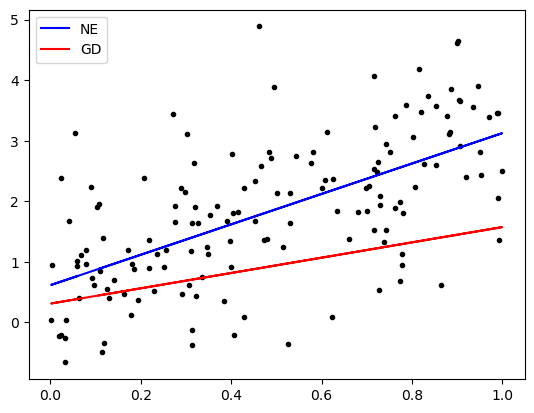

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X.iloc[:,1], y, '.k') #산점도
plt.plot(X.iloc[:,1], y_hat_NE, '-b', label = 'NE') #정규방정식
plt.plot(X.iloc[:,1], y_hat_GD, '-r', label = 'GD') #경사하강법
plt.legend()
plt.show()